<a href="https://colab.research.google.com/github/HelmyPurnomoHidayat22/prak-dwdm/blob/main/modul11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [2]:
X = pd.read_csv('Mall_Customers.csv')

In [3]:
X.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = X.filter(("Annual Income (k$)", "Spending Score (1-100)"), axis = 1)

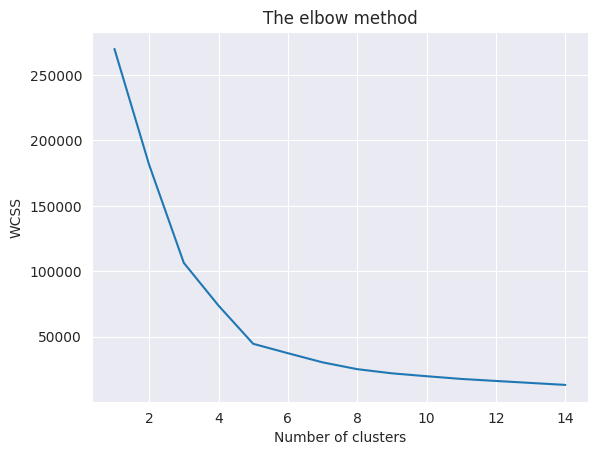

In [5]:
WCSS = []
for i in range(1, 15):
    kmeans = KMeans (n_clusters = i, init = 'k-means++',
max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit (X)
    WCSS.append(kmeans.inertia_)
#Melakukan plot untuk hasil sehingga bisa melakukan observasi terhadap elbow
plt.plot(range (1, 15), WCSS)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #WCSS = within cluster sum of squares
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

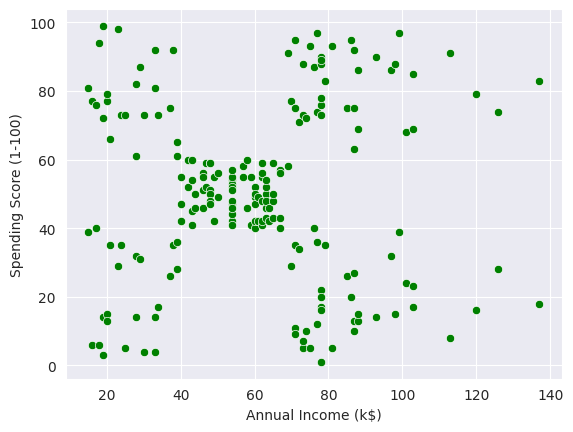

In [6]:

sns.scatterplot (data=X, x="Annual Income (k$)", y="Spending Score (1-100)", c="green")


In [7]:
model = KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [8]:
print(model.cluster_centers_)

[[55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]]


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

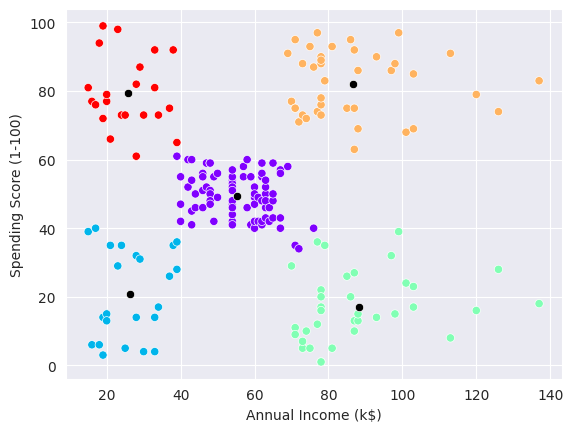

In [9]:
sns.scatterplot (data = X, x="Annual Income (k$)", y= "Spending Score (1-100)", c= model.labels_, cmap= 'rainbow')
sns.scatterplot (x=model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1], c=['black'])

###**Tugas**###

In [21]:
# Import required libraries
import pandas as pd  # Digunakan untuk memproses data dalam format DataFrame
from sklearn.cluster import KMeans  # Algoritma clustering untuk pengelompokan data
from sklearn.preprocessing import StandardScaler  # Normalisasi data
from sklearn.decomposition import PCA  # Reduksi dimensi menggunakan Principal Component Analysis
import matplotlib.pyplot as plt  # Untuk visualisasi grafik 2D dan 3D
from mpl_toolkits.mplot3d import Axes3D  # Untuk membuat grafik 3D



In [20]:

# Load the Spotify dataset
file_path = 'spotify_data.csv'  # Lokasi file dataset Spotify
spotify_data = pd.read_csv(file_path)  # Membaca dataset ke dalam DataFrame



In [22]:

# Select relevant columns (numeric features only)
# Memilih kolom yang relevan untuk clustering (kolom 3 sampai 16)
features = spotify_data.iloc[:, 2:16]  # Mengambil kolom 3 hingga 16
numeric_features = features.select_dtypes(include=['float64', 'int64'])
# Memfilter kolom hanya dengan tipe data numerik (float64 dan int64)

In [24]:
# Normalize the numeric data using StandardScaler
scaler = StandardScaler()  # Membuat instance StandardScaler
normalized_numeric_features = scaler.fit_transform(numeric_features)
# Menstandarkan data agar setiap fitur memiliki rata-rata 0 dan standar deviasi 1


In [26]:
# Apply KMeans clustering with 3 clusters (as an example)
kmeans = KMeans(n_clusters=3, random_state=42)  # Menginisialisasi KMeans dengan 3 cluster
spotify_data['Cluster'] = kmeans.fit_predict(normalized_numeric_features)
# Menambahkan hasil cluster ke dataset dalam kolom baru bernama 'Cluster'


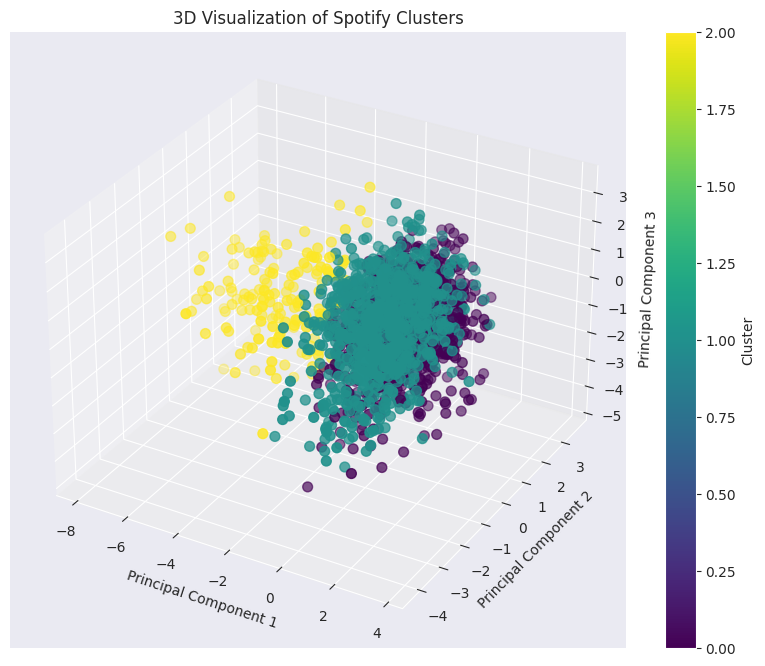

In [31]:
# Visualize the clusters in 3D space
fig = plt.figure(figsize=(10, 8))  # Membuat figure untuk plot dengan ukuran 10x8 inci
ax = fig.add_subplot(111, projection='3d')  # Menambahkan subplot 3D ke figure

# Scatter plot for the clusters
scatter = ax.scatter(
    reduced_numeric_features[:, 0],  # Komponen PCA ke-1 sebagai sumbu X
    reduced_numeric_features[:, 1],  # Komponen PCA ke-2 sebagai sumbu Y
    reduced_numeric_features[:, 2],  # Komponen PCA ke-3 sebagai sumbu Z
    c=spotify_data['Cluster'],  # Warna berdasarkan hasil cluster
    cmap='viridis',  # Palet warna yang digunakan adalah 'viridis'
    s=50  # Ukuran marker pada scatter plot
)

# Add labels and legend
ax.set_title("3D Visualization of Spotify Clusters")  # Menambahkan judul pada plot
ax.set_xlabel("Principal Component 1")  # Label untuk sumbu X
ax.set_ylabel("Principal Component 2")  # Label untuk sumbu Y
ax.set_zlabel("Principal Component 3")  # Label untuk sumbu Z
plt.colorbar(scatter, ax=ax, label='Cluster')  # Menambahkan legenda untuk cluster
plt.show()  # Menampilkan plot


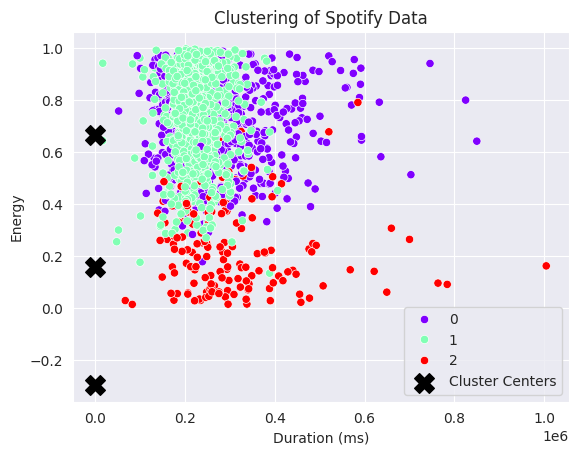

In [16]:
# Scatter plot untuk data berdasarkan cluster
sns.scatterplot(
    data=spotify_data,
    x="duration_ms",
    y="energy",
    hue=spotify_data['Cluster'],  # Gunakan 'hue' untuk warna berdasarkan cluster
    palette='rainbow'
)

# Scatter plot untuk pusat cluster
plt.scatter(
    x=kmeans.cluster_centers_[:, 0],  # Koordinat X dari pusat cluster
    y=kmeans.cluster_centers_[:, 1],  # Koordinat Y dari pusat cluster
    color='black',
    label='Cluster Centers',
    s=200,
    marker='X'
)

# Menambahkan label dan judul
plt.title("Clustering of Spotify Data")
plt.xlabel("Duration (ms)")
plt.ylabel("Energy")
plt.legend()
plt.show()